In [1]:
import pandas as pd
import sqlite3
import matplotlib

In [2]:
con = sqlite3.connect("../data/checking-logs.sqlite.sqlite")

In [17]:
df_pageviews = pd.read_sql_query("SELECT datetime FROM pageviews where uid like 'user%'", con, parse_dates=["datetime"])
df_commits = pd.read_sql_query("SELECT timestamp as datetime FROM checker where uid like 'user%'", con, parse_dates=["datetime"])
df_pageviews


,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


In [42]:
grouped_pv = df_pageviews.groupby(df_pageviews["datetime"].dt.date).count().rename({"datetime":"views"}, axis = 1)

grouped_c = df_commits.groupby(df_commits["datetime"].dt.date).count().rename({"datetime":"commits"}, axis = 1)

grouped = grouped_pv.join(other = grouped_c, on = "datetime", how = "inner")
grouped

,views,commits
datetime,,
2020-04-17,1,23
2020-04-18,23,69
2020-04-19,15,33
2020-04-21,3,25
2020-04-22,1,28
2020-04-23,5,43
2020-04-25,1,104
2020-04-26,8,261
2020-04-28,2,5


<AxesSubplot:title={'center':'Views per day'}, xlabel='datetime'>

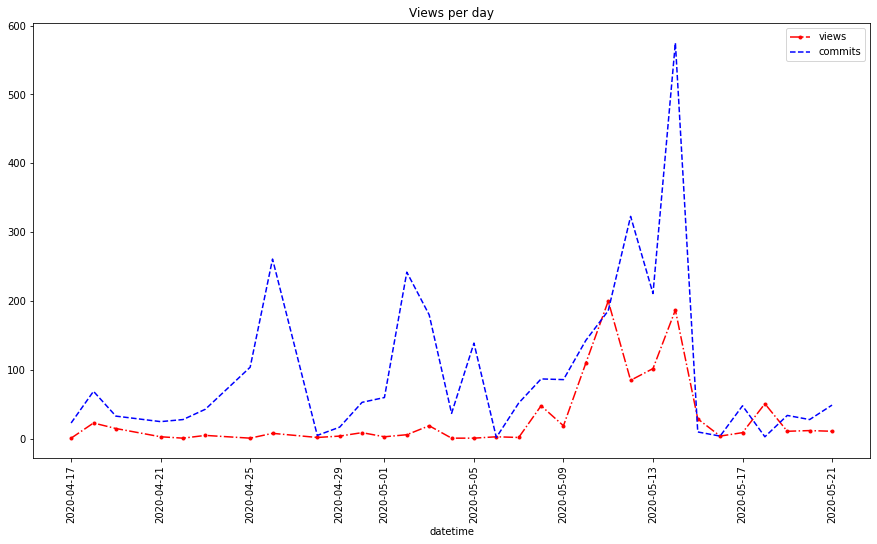

In [39]:
grouped.plot(figsize = (15, 8), fontsize = 10, title = "Views per day", rot = 90,
             style = {
    "views" : "r.-.",
    "commits" : "b--"
})

# df_commits.groupby(
#     df_commits["datetime"].dt.date).count().plot(figsize = (15, 8), fontsize = 10, title = "Views per day", rot = 90)

In [41]:
grouped[grouped["views"] > 150]

,views,commits
datetime,,
2020-05-11,200,186
2020-05-14,187,575


## "How many times was the number of views larger than 150?"
### "The answer is 2". 